In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
df=pd.read_csv('antispam.csv',usecols=lambda column : column not in ['signup_country_name_zh','latest_country_name_zh','latest_province_name_zh','latest_city_name_zh'])

# basic information of active_users_df

* ### samples of active_users_df

In [3]:
df.head()

,user_id,status,gender,age,created_time,day_in_app,is_vip,signup_os_name,latest_os_name,looking_for_gender,...,follow_max_7,unfollow_max_7,vip_revenue_max_7,see_revenue_max_7,superlike_revenue_max_7,boost_revenue_max_7,block_max_7,report_max_7,duration_max_7,app_opens_max_7
0,243043080,default,male,19,2019-02-23 23:57:05.829,7,0,android,android,female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.600767,NaN
1,243042568,default,male,29,2019-02-23 23:55:59.836,7,0,android,android,female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.395967,NaN
2,243042216,default,male,22,2019-02-23 23:55:12.997,7,0,android,android,female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.132300,NaN
3,243040936,default,female,40,2019-02-23 23:52:19.465,7,0,android,android,male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.030750,NaN
4,243040872,default,female,24,2019-02-23 23:52:08.284,7,0,ios,ios,male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133.491933,NaN


In [4]:
print('# of rows: {}'.format(df.shape[0]))
print('# of columns: {}'.format(df.shape[1]))

# of rows: 1068758
# of columns: 172


* ### description of active_users_df

In [5]:
print('int64 type columns \n{} '.format(df.dtypes[df.dtypes=='int64']))
print('object type columns \n{}'.format(df.dtypes[df.dtypes=='object']))
print('float64 type columns \n{}'.format(df.dtypes[df.dtypes=='float64']))

int64 type columns 
user_id           int64
age               int64
day_in_app        int64
is_vip            int64
search_min_age    int64
search_max_age    int64
dtype: object 
object type columns 
status                object
gender                object
created_time          object
signup_os_name        object
latest_os_name        object
looking_for_gender    object
dtype: object
float64 type columns 
msg_receiver_cnt                          float64
wechat_receiver_cnt                       float64
wechat_cnt                                float64
wechat_cnt_strict                         float64
msg_receiver_cnt_avg_3                    float64
wechat_receiver_cnt_avg_3                 float64
wechat_cnt_avg_3                          float64
wechat_cnt_strict_avg_3                   float64
msg_receiver_cnt_avg_7                    float64
wechat_receiver_cnt_avg_7                 float64
wechat_cnt_avg_7                          float64
wechat_cnt_strict_avg_7                 

In [6]:
df.describe()

,user_id,age,day_in_app,is_vip,search_min_age,search_max_age,msg_receiver_cnt,wechat_receiver_cnt,wechat_cnt,wechat_cnt_strict,...,follow_max_7,unfollow_max_7,vip_revenue_max_7,see_revenue_max_7,superlike_revenue_max_7,boost_revenue_max_7,block_max_7,report_max_7,duration_max_7,app_opens_max_7
count,1.068758e+06,1.068758e+06,1.068758e+06,1.068758e+06,1.068758e+06,1.068758e+06,483714.000000,483714.000000,483714.000000,483714.000000,...,1.055945e+06,1.055945e+06,1.055945e+06,1.055945e+06,1.055945e+06,1.055945e+06,1.055945e+06,1.055945e+06,1.055945e+06,0.0
mean,1.537169e+08,2.760390e+01,3.474712e+02,1.761737e-01,1.973055e+01,8.508488e+01,4.466577,0.322786,0.371945,0.023648,...,4.589728e-02,8.633025e-03,5.093381e-01,7.729209e-01,8.591641e-02,1.181321e-01,5.549531e-04,2.151248e-02,2.449435e+01,NaN
std,6.970845e+07,9.665053e+00,3.338250e+02,3.809680e-01,5.199016e+00,8.005199e+01,14.090240,2.666396,2.798734,1.391072,...,2.768274e+00,8.101639e-01,3.576400e+00,8.305341e+00,1.904243e+00,2.372964e+00,4.674841e-02,4.466039e-01,3.934792e+01,NaN
min,3.000000e+00,1.600000e+01,7.000000e+00,0.000000e+00,1.600000e+01,1.600000e+01,1.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,1.024392e+08,2.100000e+01,8.600000e+01,0.000000e+00,1.800000e+01,2.500000e+01,1.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.138133e+00,NaN
50%,1.698289e+08,2.500000e+01,2.160000e+02,0.000000e+00,1.800000e+01,3.500000e+01,2.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.607000e+00,NaN
75%,2.148444e+08,3.200000e+01,5.430000e+02,0.000000e+00,1.800000e+01,2.000000e+02,4.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.896255e+01,NaN
max,2.430444e+08,1.030000e+02,1.761000e+03,1.000000e+00,5.000000e+01,2.000000e+02,1515.000000,495.000000,495.000000,407.000000,...,1.535000e+03,6.310000e+02,3.720000e+02,4.440000e+02,3.000000e+02,2.210000e+02,3.700000e+01,1.300000e+02,1.833238e+03,NaN


# EDA

* ### compare default users and banned users' distribution on each matric

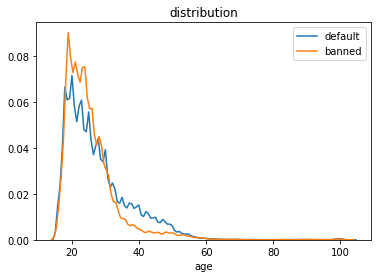

In [7]:
fig=plt.figure()
sns.distplot(df[df.status=='default'].age,hist=False,label='default')
sns.distplot(df[df.status=='banned'].age,hist=False,label='banned')
plt.legend(['default','banned'])
plt.title('distribution')
plt.show()

Text(0.5, 1.0, 'distribution')

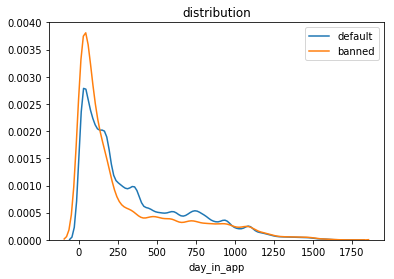

In [8]:
fig=plt.figure()
sns.distplot(df[df.status=='default'].day_in_app,hist=False,label='default')
sns.distplot(df[df.status=='banned'].day_in_app,hist=False,label='banned')
plt.legend(['default','banned'])
plt.title('distribution')

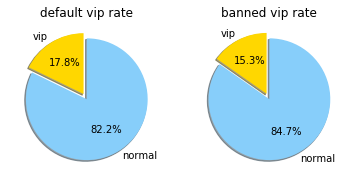

In [9]:
fig, axs= plt.subplots(1,2)
labels='vip', 'normal'
explode=(0.1,0)
colors=['gold','lightskyblue']
sizes_d=[sum((df.is_vip==1)&(df.status=='default')),sum((df.is_vip==0)&(df.status=='default'))]
sizes_b=[sum((df.is_vip==1)&(df.status=='banned')),sum((df.is_vip==0)&(df.status=='banned'))]
axs[0].pie(sizes_d,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
axs[0].set(aspect='equal',title='default vip rate')
axs[1].pie(sizes_b,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
axs[1].set(aspect='equal',title='banned vip rate')
plt.show()

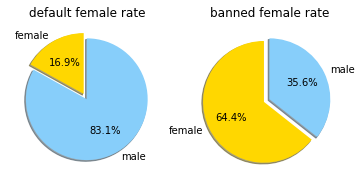

In [10]:
fig, axs= plt.subplots(1,2)
labels='female', 'male'
explode=(0.1,0)
colors=['gold','lightskyblue']
sizes_d=[sum((df.gender=='female')&(df.status=='default')),sum((df.gender=='male')&(df.status=='default'))]
sizes_b=[sum((df.gender=='female')&(df.status=='banned')),sum((df.gender=='male')&(df.status=='banned'))]
axs[0].pie(sizes_d,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
axs[0].set(aspect='equal',title='default female rate')
axs[1].pie(sizes_b,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
axs[1].set(aspect='equal',title='banned female rate')
plt.show()

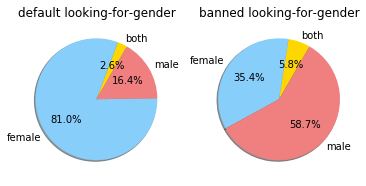

In [11]:
fig, axs= plt.subplots(1,2)
labels='both', 'female', 'male'
explode=(0,0,0)
colors=['gold','lightskyblue','lightcoral']
sizes_d=[sum((df.looking_for_gender=='both')&(df.status=='default')),sum((df.looking_for_gender=='female')&(df.status=='default')),sum((df.looking_for_gender=='male')&(df.status=='default'))]
sizes_b=[sum((df.looking_for_gender=='both')&(df.status=='banned')),sum((df.looking_for_gender=='female')&(df.status=='banned')),sum((df.looking_for_gender=='male')&(df.status=='banned'))]
axs[0].pie(sizes_d,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=60)
axs[0].set(aspect='equal',title='default looking-for-gender')
axs[1].pie(sizes_b,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=60)
axs[1].set(aspect='equal',title='banned looking-for-gender')
plt.show()

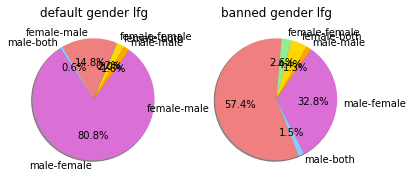

In [12]:
fig, axs= plt.subplots(1,2)
labels='female-both', 'female-female', 'female-male','male-both','male-female','male-male'
explode=(0,0,0,0,0,0)
colors=['gold','lightgreen','lightcoral','lightskyblue','orchid','orange','lilac']
sizes_d=[sum((df.gender=='female')&(df.looking_for_gender=='both')&(df.status=='default')),sum((df.gender=='female')&(df.looking_for_gender=='female')&(df.status=='default')),sum((df.gender=='female')&(df.looking_for_gender=='male')&(df.status=='default'))
        ,sum((df.gender=='male')&(df.looking_for_gender=='both')&(df.status=='default')),sum((df.gender=='male')&(df.looking_for_gender=='female')&(df.status=='default')),sum((df.gender=='male')&(df.looking_for_gender=='male')&(df.status=='default'))]
sizes_b=[sum((df.gender=='female')&(df.looking_for_gender=='both')&(df.status=='banned')),sum((df.gender=='female')&(df.looking_for_gender=='female')&(df.status=='banned')),sum((df.gender=='female')&(df.looking_for_gender=='male')&(df.status=='banned'))
        ,sum((df.gender=='male')&(df.looking_for_gender=='both')&(df.status=='banned')),sum((df.gender=='male')&(df.looking_for_gender=='female')&(df.status=='banned')),sum((df.gender=='male')&(df.looking_for_gender=='male')&(df.status=='banned'))]
axs[0].pie(sizes_d,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=60)
axs[0].set(aspect='equal',title='default gender lfg')
axs[1].pie(sizes_b,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=60)
axs[1].set(aspect='equal',title='banned gender lfg')
plt.show()

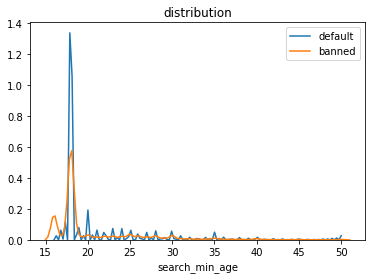

In [13]:
fig=plt.figure()
sns.distplot(df[df.status=='default'].search_min_age,hist=False,label='default')
sns.distplot(df[df.status=='banned'].search_min_age,hist=False,label='banned')
plt.legend(['default','banned'])
plt.title('distribution')
plt.show()

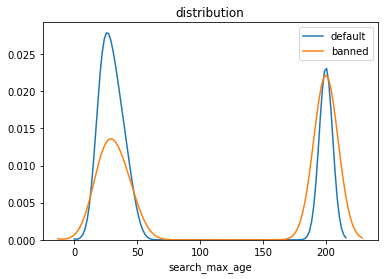

In [14]:
fig=plt.figure()
sns.distplot(df[df.status=='default'].search_max_age,hist=False,label='default')
sns.distplot(df[df.status=='banned'].search_max_age,hist=False,label='banned')
plt.legend(['default','banned'])
plt.title('distribution')
plt.show()

In [15]:
print(sum(df.latest_os_name=='android'))
print(sum(df.latest_os_name=='ios'))
print(sum(df.signup_os_name.isna()))

775859
292809
90


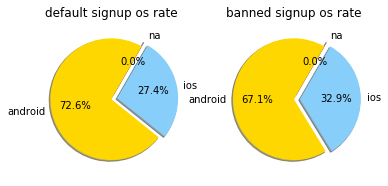

In [16]:
fig, axs= plt.subplots(1,2)
labels='android', 'ios', 'na'
explode=(0,0.1,0.1)
colors=['gold','lightskyblue','lightcoral']
sizes_d=[sum((df.signup_os_name=='android')&(df.status=='default')),sum((df.signup_os_name=='ios')&(df.status=='default')),sum((df.signup_os_name.isna())&(df.status=='default'))]
sizes_b=[sum((df.signup_os_name=='android')&(df.status=='banned')),sum((df.signup_os_name=='ios')&(df.status=='banned')),sum((df.signup_os_name.isna())&(df.status=='banned'))]
axs[0].pie(sizes_d,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=60)
axs[0].set(aspect='equal',title='default signup os rate')
axs[1].pie(sizes_b,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=60)
axs[1].set(aspect='equal',title='banned signup os rate')
plt.show()

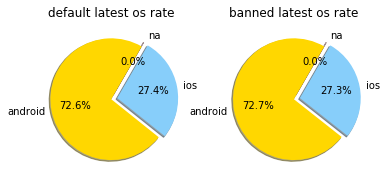

In [17]:
fig, axs= plt.subplots(1,2)
labels='android', 'ios', 'na'
explode=(0,0.1,0.1)
colors=['gold','lightskyblue','lightcoral']
sizes_d=[sum((df.latest_os_name=='android')&(df.status=='default')),sum((df.latest_os_name=='ios')&(df.status=='default')),sum((df.latest_os_name.isna())&(df.status=='default'))]
sizes_b=[sum((df.latest_os_name=='android')&(df.status=='banned')),sum((df.latest_os_name=='ios')&(df.status=='banned')),sum((df.latest_os_name.isna())&(df.status=='banned'))]
axs[0].pie(sizes_d,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=60)
axs[0].set(aspect='equal',title='default latest os rate')
axs[1].pie(sizes_b,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=60)
axs[1].set(aspect='equal',title='banned latest os rate')
plt.show()

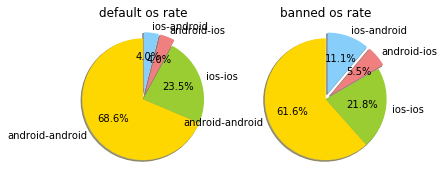

In [18]:
fig, axs= plt.subplots(1,2)
labels='android-android', 'ios-ios', 'android-ios','ios-android'
explode=(0,0,0.1,0.1)
colors=['gold','yellowgreen','lightcoral','lightskyblue']
sizes_d=[sum((df.signup_os_name=='android')&(df.latest_os_name=='android')&(df.status=='default')),sum((df.signup_os_name=='ios')&(df.latest_os_name=='ios')&(df.status=='default')),sum((df.signup_os_name=='android')&(df.latest_os_name=='ios')&(df.status=='default')),sum((df.signup_os_name=='ios')&(df.latest_os_name=='android')&(df.status=='default'))]
sizes_b=[sum((df.signup_os_name=='android')&(df.latest_os_name=='android')&(df.status=='banned')),sum((df.signup_os_name=='ios')&(df.latest_os_name=='ios')&(df.status=='banned')),sum((df.signup_os_name=='android')&(df.latest_os_name=='ios')&(df.status=='banned')),sum((df.signup_os_name=='ios')&(df.latest_os_name=='android')&(df.status=='banned'))]
axs[0].pie(sizes_d,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
axs[0].set(aspect='equal',title='default os rate')
axs[1].pie(sizes_b,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
axs[1].set(aspect='equal',title='banned os rate')
plt.show()

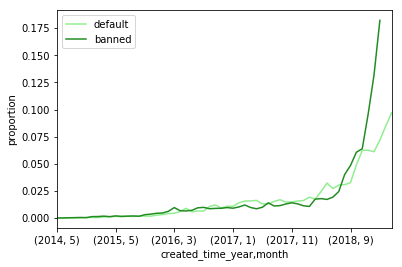

In [19]:
#creat_time_month
fig=plt.figure()
df['created_time']=df['created_time'].astype('datetime64')
(df.loc[df.status=='default','user_id'].groupby([df['created_time'].dt.year, df['created_time'].dt.month]).count()/len(df[df.status=='default'])).plot(color='lightgreen')
(df.loc[df.status=='banned','user_id'].groupby([df['created_time'].dt.year, df['created_time'].dt.month]).count()/len(df[df.status=='banned'])).plot(color='forestgreen')
plt.legend(['default','banned'])
plt.xlabel('created_time_year,month')
plt.ylabel('proportion')
plt.show()

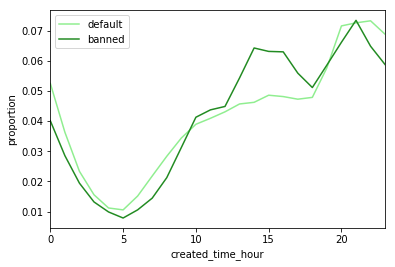

In [20]:
#creat_time_hour
fig=plt.figure()
(df.loc[df.status=='default','user_id'].groupby(df['created_time'].dt.hour).count()/len(df[df.status=='default'])).plot(color='lightgreen')
(df.loc[df.status=='banned','user_id'].groupby(df['created_time'].dt.hour).count()/len(df[df.status=='banned'])).plot(color='forestgreen')
plt.legend(['default','banned'])
plt.xlabel('created_time_hour')
plt.ylabel('proportion')
plt.show()

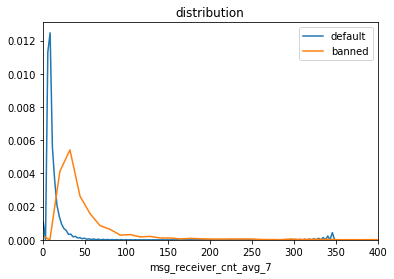

In [21]:
fig=plt.figure()
sns.distplot(df[df.status=='default'].msg_receiver_cnt_avg_7,hist=False,label='default')
sns.distplot(df[df.status=='banned'].msg_receiver_cnt_avg_7,hist=False,label='banned')
plt.legend(['default','banned'])
plt.title('distribution')
plt.xlim(0,400)
plt.show()

# to be continued

### NAs

In [22]:
#number of nas in each columns
for i in df.columns:
    na_cnt=sum(df[i].isna())
    if na_cnt>1000000:
        print('{} : {}'.format(i,na_cnt))

reported_cnt : 1064229
reported_cnt_avg_3 : 1058310
reported_cnt_avg_7 : 1049419
reported_cnt_max_7 : 1049419
app_opens : 1068758
app_opens_avg_3 : 1068758
app_opens_avg_7 : 1068758
app_opens_max_7 : 1068758


In [23]:
for i in df.columns:
    na_cnt=sum(df[i].isna())
    print('{} : {}'.format(i,na_cnt))

user_id : 0
status : 0
gender : 0
age : 0
created_time : 0
day_in_app : 0
is_vip : 0
signup_os_name : 90
latest_os_name : 90
looking_for_gender : 0
search_min_age : 0
search_max_age : 0
msg_receiver_cnt : 585044
wechat_receiver_cnt : 585044
wechat_cnt : 585044
wechat_cnt_strict : 585044
msg_receiver_cnt_avg_3 : 394051
wechat_receiver_cnt_avg_3 : 394051
wechat_cnt_avg_3 : 394051
wechat_cnt_strict_avg_3 : 394051
msg_receiver_cnt_avg_7 : 255643
wechat_receiver_cnt_avg_7 : 255643
wechat_cnt_avg_7 : 255643
wechat_cnt_strict_avg_7 : 255643
msg_receiver_cnt_max_7 : 255643
wechat_receiver_cnt_max_7 : 255643
wechat_cnt_max_7 : 255643
wechat_cnt_strict_max_7 : 255643
reported_cnt : 1064229
reported_cnt_avg_3 : 1058310
reported_cnt_avg_7 : 1049419
reported_cnt_max_7 : 1049419
swipe : 21918
likes : 21918
dislike : 21918
super_like : 21918
match : 21918
unmatch : 21918
receive_unmatch : 21918
receive_swipe : 21918
receive_like : 21918
receive_dislike : 21918
receive_super_like : 21918
revenue : 219

In [24]:
df1=df.drop(['app_opens','app_opens_avg_3','app_opens_avg_7','app_opens_max_7'],axis=1)

In [25]:
df2=df1.dropna(subset=['signup_os_name','latest_os_name'])

In [26]:
df3=df2.fillna(0)

In [27]:
df4=df3.drop(['user_id','created_time'],axis=1)

### redefine Y

In [28]:
def y(x):
    if x=='default':
        return 0
    elif x=='banned':
        return 1
df4['status']=df4.status.apply(y)

### function to convert object variable to dummy and function to scale numeric features

In [29]:
from sklearn.preprocessing import scale
num_col=df3.columns[~df3.columns.isin(['user_id','status','gender','created_time','is_vip','signup_os_name','latest_os_name','looking_for_gender'])]
def num_scale(dataframe):
    for i in num_col:
        dataframe[i]=scale(dataframe[i])

In [30]:
todummy_list=['gender','is_vip','signup_os_name','latest_os_name','looking_for_gender']
def dummy_df(data,todummy_list):
    for x in todummy_list:
        dummies=pd.get_dummies(data[x],prefix=x)
        data=data.drop(x,1)
        data=pd.concat([data,dummies],axis=1)
    return data
df4=dummy_df(df4,todummy_list)

### split data into training set and test set

In [31]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df4, test_size=0.2,random_state=42)

In [32]:
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

In [33]:
x_train=train.drop(['status'],axis=1)
y_train=train['status']
x_test=test.drop(['status'],axis=1)
y_test=test['status']

In [34]:
#undersampling(perhaps oversampling smote is better)
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=42)
x_res,y_res=rus.fit_resample(x_train,y_train)
x_train_us=pd.DataFrame(x_res,columns=x_train.columns)
y_train_us=pd.Series(y_res,name='status')

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [36]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [37]:
rus=RandomUnderSampler(random_state=42)
x_res,y_res=rus.fit_resample(x_test,y_test)
x_test_us=pd.DataFrame(x_res,columns=x_test.columns)
y_test_us=pd.Series(y_res,name='status')

In [38]:
#feature_list
fea_list=['age','day_in_app','search_min_age','search_max_age','msg_receiver_cnt_avg_7','wechat_receiver_cnt_avg_7',
          'wechat_cnt_avg_7','wechat_cnt_strict_avg_7','reported_cnt_avg_7',
          'swipe_avg_7','likes_avg_7','dislike_avg_7','super_like_avg_7','match_avg_7','unmatch_avg_7','receive_unmatch_avg_7',
         'receive_swipe_avg_7','receive_like_avg_7','receive_dislike_avg_7','receive_super_like_avg_7',
         'revenue_avg_7','messages_avg_7','one_side_conversation_avg_7','one_mutual_msg_conversation_avg_7',
         'five_mutual_msg_conversation_avg_7','ten_mutual_msg_conversation_avg_7','new_messages_avg_7','new_one_side_conversation_avg_7',
         'new_one_mutual_msg_conversation_avg_7','new_five_mutual_msg_conversation_avg_7','receive_message_avg_7',
         'moment_post_avg_7','moment_comment_avg_7','moment_like_avg_7','follow_avg_7','unfollow_avg_7',
         'vip_revenue_avg_7','see_revenue_avg_7','superlike_revenue_avg_7','boost_revenue_avg_7',
         'block_avg_7','report_avg_7','duration_avg_7','gender_female','gender_male','is_vip_0','is_vip_1',
         'signup_os_name_android','signup_os_name_ios','latest_os_name_android','latest_os_name_ios',
         'looking_for_gender_both','looking_for_gender_female','looking_for_gender_male']

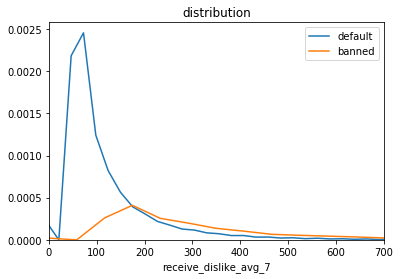

In [39]:
fig=plt.figure()
sns.distplot(df4[df4.status==0].receive_dislike_avg_7,label='default',hist=False)
sns.distplot(df4[df4.status==1].receive_dislike_avg_7,label='banned',hist=False)
plt.legend(['default','banned'])
plt.title('distribution')
plt.xlim(0,700)
plt.show()

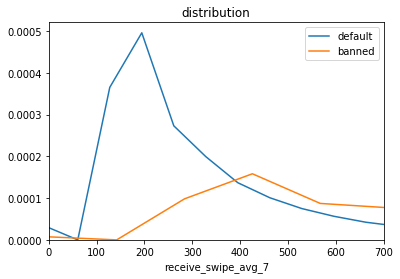

In [40]:
fig=plt.figure()
sns.distplot(df4[df4.status==0].receive_swipe_avg_7,label='default',hist=False)
sns.distplot(df4[df4.status==1].receive_swipe_avg_7,label='banned',hist=False)
plt.legend(['default','banned'])
plt.title('distribution')
plt.xlim(0,700)
plt.show()

In [41]:
#sub features
x_train_sub=x_train[['receive_dislike_avg_7','receive_swipe_avg_7','receive_like_avg_7','reported_cnt_avg_7']]
x_test_sub=x_test[['receive_dislike_avg_7','receive_swipe_avg_7','receive_like_avg_7','reported_cnt_avg_7']]
m=RandomForestClassifier(n_estimators=15,oob_score=True,random_state=42)
m.fit(x_train_sub,y_train)
y_pred=m.predict(x_test_sub)
prob=m.predict_proba(x_test_sub)
score=roc_auc_score(y_test,prob[:,1])
print('AUC score is: {:.2%}'.format(score))

AUC score is: 95.28%


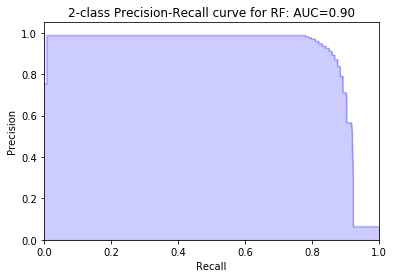

In [42]:
#print(average_precision_score(y_test,prob[:,1]))
precition_r,recall_r,_=precision_recall_curve(y_test,prob[:,1])
plt.step(recall_r,precition_r,color='b',alpha=0.2,where='post')
plt.fill_between(recall_r,precition_r,step='post',alpha=0.2,color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0,1.05])
plt.xlim([0.0,1.0])
plt.title('2-class Precision-Recall curve for RF: AUC={0:0.2f}'.format(
          average_precision_score(y_test,prob[:,1])))
plt.show()

In [43]:
x_train_sub=x_train[fea_list]
x_test_sub=x_test[fea_list]

In [44]:
#randomforest selection:
pipeline=Pipeline([('classifier', RandomForestClassifier(random_state=42))])
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'classifier', 'classifier__bootstrap', 'classifier__class_weight', 'classifier__criterion', 'classifier__max_depth', 'classifier__max_features', 'classifier__max_leaf_nodes', 'classifier__min_impurity_decrease', 'classifier__min_impurity_split', 'classifier__min_samples_leaf', 'classifier__min_samples_split', 'classifier__min_weight_fraction_leaf', 'classifier__n_estimators', 'classifier__n_jobs', 'classifier__oob_score', 'classifier__random_state', 'classifier__verbose', 'classifier__warm_start'])

In [45]:
hyperparameters={
                'classifier__n_estimators':[10,15,20,30,50],
                'classifier__max_depth':[2,4,8],
                'classifier__min_samples_leaf':[2,4,8]
                }
clf=GridSearchCV(pipeline,hyperparameters,cv=3,scoring='f1')
clf.fit(x_train_sub,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('classifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'classifier__n_estimators': [10, 15, 20, 30, 50], 'classifier__max_depth': [2, 4, 8], 'classifier__min_samples_leaf': [2, 4, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [46]:
clf.best_params_

{'classifier__max_depth': 8,
 'classifier__min_samples_leaf': 2,
 'classifier__n_estimators': 30}

In [47]:
clf.refit
y_preds=clf.predict(x_test_sub)
probs=clf.predict_proba(x_test_sub)
score=roc_auc_score(y_test,probs[:,1])
print('AUC of roc score is: {:.2%}'.format(score))

AUC of roc score is: 99.05%


In [48]:
rfm=RandomForestClassifier(n_estimators=30,min_samples_leaf=2,max_depth=8,random_state=42)
rfm.fit(x_train_sub,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

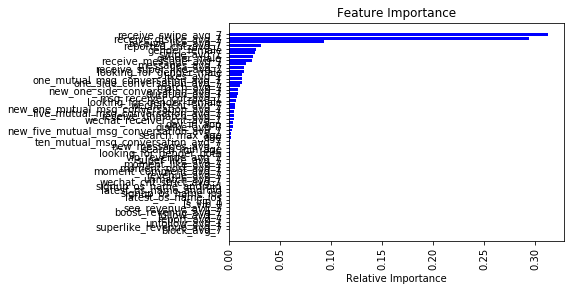

In [49]:
features=x_test_sub.columns
importances = rfm.feature_importances_
indices=np.argsort(importances)
plt.title('Feature Importance')
plt.barh(range(len(indices)),importances[indices],color='b', align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.xticks(rotation=90)
plt.show()

In [50]:
x_train_re=x_train_sub.drop([features[i] for i in indices[20:]],axis=1)
x_test_re=x_test_sub.drop([features[i] for i in indices[20:]],axis=1)

In [51]:
rfm_re=RandomForestClassifier(n_estimators=30,min_samples_leaf=2,max_depth=8,random_state=42)
rfm_re.fit(x_train_re,y_train)
y_preds_rfm_re=rfm_re.predict(x_test_re)
probs_rfm_re=rfm_re.predict_proba(x_test_re)
score=roc_auc_score(y_test,probs_rfm_re[:,1])
print('AUC of roc score is: {:.2%}'.format(score))

AUC of roc score is: 70.68%


In [52]:
print([features[i] for i in indices[20:]])

['vip_revenue_avg_7', 'looking_for_gender_both', 'search_min_age', 'new_messages_avg_7', 'ten_mutual_msg_conversation_avg_7', 'age', 'search_max_age', 'new_five_mutual_msg_conversation_avg_7', 'dislike_avg_7', 'day_in_app', 'wechat_receiver_cnt_avg_7', 'receive_unmatch_avg_7', 'five_mutual_msg_conversation_avg_7', 'new_one_mutual_msg_conversation_avg_7', 'wechat_cnt_avg_7', 'looking_for_gender_female', 'msg_receiver_cnt_avg_7', 'duration_avg_7', 'new_one_side_conversation_avg_7', 'match_avg_7', 'one_side_conversation_avg_7', 'one_mutual_msg_conversation_avg_7', 'likes_avg_7', 'looking_for_gender_male', 'receive_super_like_avg_7', 'messages_avg_7', 'receive_message_avg_7', 'gender_male', 'swipe_avg_7', 'gender_female', 'reported_cnt_avg_7', 'receive_like_avg_7', 'receive_dislike_avg_7', 'receive_swipe_avg_7']


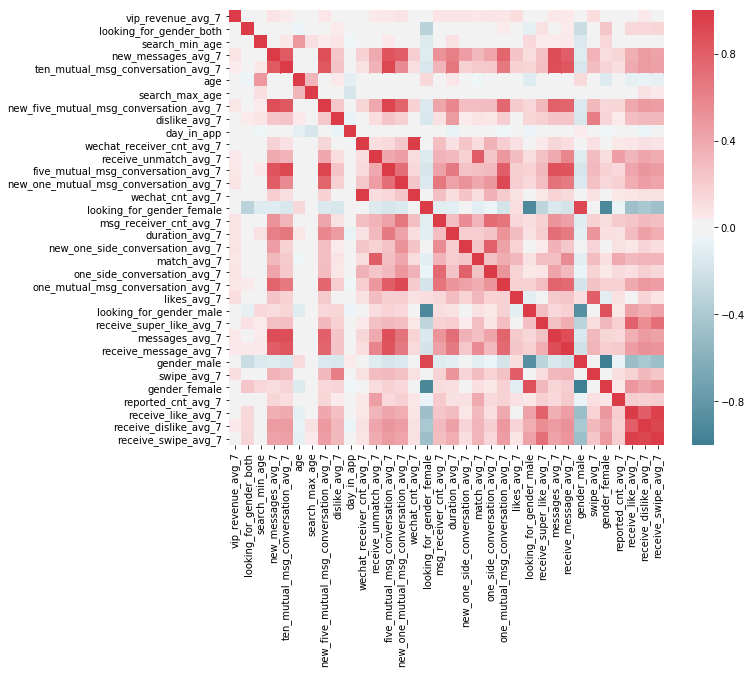

In [53]:
f,ax=plt.subplots(figsize=(10,8))
corr=df4[[features[i] for i in indices[20:]]].corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap = sns.diverging_palette(220,10, as_cmap = True),
           square = True, ax = ax)
plt.show()

### reduce collinearity (pick more important ones)

In [54]:
#filter out those features corr > 0.75
fea_re=['receive_swipe_avg_7','reported_cnt_avg_7','gender_female',
        'swipe_avg_7','receive_message_avg_7','one_side_conversation_avg_7',
        'match_avg_7','duration_avg_7','wechat_cnt_avg_7',
        'day_in_app','dislike_avg_7','search_max_age',
        'age','search_min_age','vip_revenue_avg_7']

In [55]:
rfm_test=RandomForestClassifier(n_estimators=30,min_samples_leaf=2,max_depth=8,random_state=42)
rfm_test.fit(x_train_sub[fea_re],y_train)
y_preds_rfm_test=rfm_test.predict(x_test_sub[fea_re])
probs_rfm_test=rfm_test.predict_proba(x_test_sub[fea_re])
score_test=roc_auc_score(y_test,probs_rfm_test[:,1])
print('AUC of roc score is: {:.2%}'.format(score_test))

AUC of roc score is: 99.03%


In [56]:
print('accuracy score is: {:.2%}'.format(accuracy_score(y_test,y_preds_rfm_test)))

accuracy score is: 98.96%


In [57]:
#report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds_rfm_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    200072
           1       0.98      0.85      0.91     13662

   micro avg       0.99      0.99      0.99    213734
   macro avg       0.99      0.93      0.95    213734
weighted avg       0.99      0.99      0.99    213734



In [58]:
#matrix
from sklearn.metrics import confusion_matrix
tn,fp,fn,tp=confusion_matrix(y_test,y_preds_rfm_test).ravel()
print('tn: {} fp: {} fn: {} tp: {}'.format(tn,fp,fn,tp))

tn: 199876 fp: 196 fn: 2020 tp: 11642


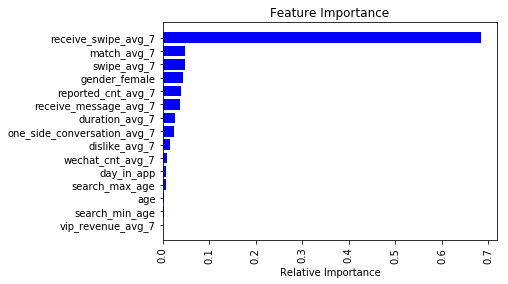

In [59]:
features_test=x_test_sub[fea_re].columns
importances_test = rfm_test.feature_importances_
indices_test=np.argsort(importances_test)
plt.title('Feature Importance')
plt.barh(range(len(indices_test)),importances_test[indices_test],color='b', align='center')
plt.yticks(range(len(indices_test)),[features_test[i] for i in indices_test])
plt.xlabel('Relative Importance')
plt.xticks(rotation=90)
plt.show()

0.9645860104641587


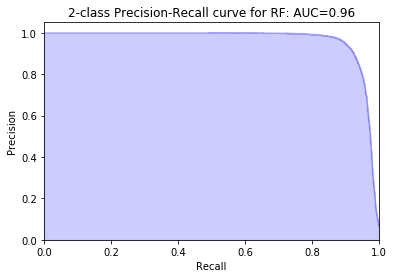

In [60]:
print(average_precision_score(y_test,probs_rfm_test[:,1]))
precition_r,recall_r,_=precision_recall_curve(y_test,probs_rfm_test[:,1])
plt.step(recall_r,precition_r,color='b',alpha=0.2,where='post')
plt.fill_between(recall_r,precition_r,step='post',alpha=0.2,color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0,1.05])
plt.xlim([0.0,1.0])
plt.title('2-class Precision-Recall curve for RF: AUC={0:0.2f}'.format(
          average_precision_score(y_test,probs_rfm_test[:,1])))
plt.show()

Text(0.5, 1.0, 'recei_swipe_avg_7 distribution')

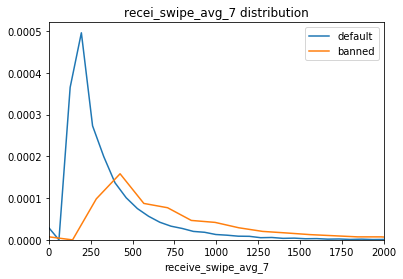

In [61]:
fig=plt.figure()
sns.distplot(df4[df4.status==0].receive_swipe_avg_7,label='default',hist=False)
sns.distplot(df4[df4.status==1].receive_swipe_avg_7,label='banned',hist=False)
plt.xlim(0,2000)
plt.legend(['default','banned'])
plt.title('recei_swipe_avg_7 distribution')

In [62]:
#accuracy_score_list when filter out one feature
asl=[]
for i in fea_re:
    xtrre=x_train_sub[fea_re].drop(i,axis=1)
    xtere=x_test_sub[fea_re].drop(i,axis=1)
    rfm_tre=RandomForestClassifier(n_estimators=30,min_samples_leaf=2,max_depth=8,random_state=42)
    rfm_tre.fit(xtrre,y_train)
    y_preds_rfm_tre=rfm_tre.predict(xtere)
    asl.append(accuracy_score(y_test,y_preds_rfm_tre))

In [63]:
#VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
x_vif=add_constant(x_train_sub[fea_re])
pd.Series([variance_inflation_factor(x_vif.values, i) for i in range(x_vif.shape[1])], index=x_vif.columns)

const                          19.063267
receive_swipe_avg_7             1.815711
reported_cnt_avg_7              1.397651
gender_female                   1.453692
swipe_avg_7                     1.974731
receive_message_avg_7           2.694857
one_side_conversation_avg_7     1.347126
match_avg_7                     2.009751
duration_avg_7                  2.572302
wechat_cnt_avg_7                1.151389
day_in_app                      1.039740
dislike_avg_7                   1.876077
search_max_age                  1.158849
age                             1.566049
search_min_age                  1.419933
vip_revenue_avg_7               1.020216
dtype: float64

### logistic regression with lasso penalty

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score
from statistics import mean
from sklearn.metrics import f1_score

In [65]:
numcols=x_train_sub.drop(['gender_female',
       'gender_male', 'is_vip_0', 'is_vip_1', 'signup_os_name_android',
       'signup_os_name_ios', 'latest_os_name_android', 'latest_os_name_ios',
       'looking_for_gender_both', 'looking_for_gender_female',
       'looking_for_gender_male'],axis=1).columns
def num_scale(dataframe):
    for i in numcols:
        dataframe[i]=scale(dataframe[i])
    return(dataframe)

In [66]:
#cross_validation row index
sfolder=StratifiedKFold(n_splits=5)

In [67]:
#undersampling function
rus=RandomUnderSampler(random_state=42)
#anova pipe
anova_filter=SelectKBest(f_regression, k=30)
pipeanova=Pipeline([('anova',anova_filter)])

In [68]:
C=[0.01,0.1,1,10,100,150]
avg_acc=[]
avg_rec=[]
avg_f1=[]
for c in C:
    acc=[]
    rec=[]
    f1=[]
    for train,test in sfolder.split(x_train_sub,y_train):
        x_train_res,y_train_res=rus.fit_resample(num_scale(x_train_sub.loc[train]),y_train.loc[train])
        x_train_res=pd.DataFrame(x_train_res,columns=x_train_sub.columns)
        y_train_res=pd.Series(y_train_res,name='status')
        x_val=num_scale(x_train_sub.loc[test])
        y_val=y_train.loc[test]
        pipeanova.fit(x_train_res,y_train_res)
        sel_fea_arr=pipeanova.named_steps.anova.get_support()
        sel_fea_list=x_train_res.columns[sel_fea_arr]
        mlog=LogisticRegression(random_state=42,C=c)
        mlog.fit(x_train_res[sel_fea_list],y_train_res)
        y_pred_log=mlog.predict(x_val[sel_fea_list])
        acc.append(accuracy_score(y_val,y_pred_log))
        rec.append(recall_score(y_val,y_pred_log))
        f1.append(f1_score(y_val,y_pred_log))
    avg_acc.append(np.mean(acc))
    avg_rec.append(np.mean(rec))
    avg_f1.append(np.mean(f1))

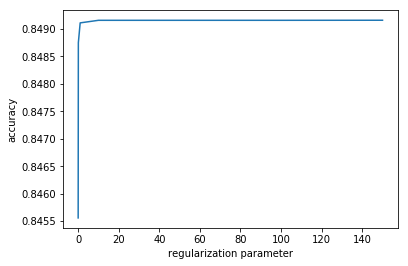

In [69]:
plt.plot(C,avg_acc)
plt.xlabel('regularization parameter')
plt.ylabel('accuracy')
plt.show()

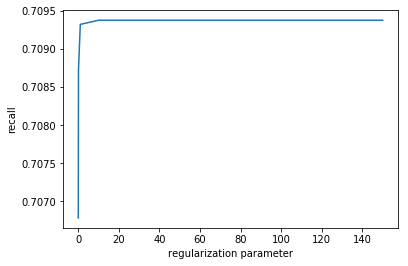

In [70]:
plt.plot(C,avg_rec)
plt.xlabel('regularization parameter')
plt.ylabel('recall')
plt.show()

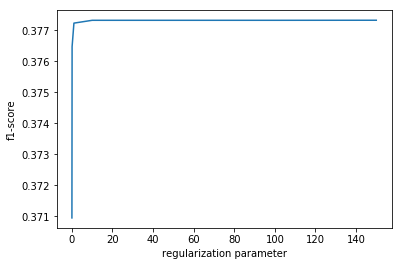

In [71]:
plt.plot(C,avg_f1)
plt.xlabel('regularization parameter')
plt.ylabel('f1-score')
plt.show()

In [72]:
#best logistic regression model
x_train_res,y_train_res=rus.fit_resample(num_scale(x_train_sub),y_train)
x_train_res=pd.DataFrame(x_train_res,columns=x_train_sub.columns)
y_train_res=pd.Series(y_train_res,name='status')
x_test_sub_nor=num_scale(x_test_sub)
pipeanova.fit(x_train_res,y_train_res)
sel_fea_arr=pipeanova.named_steps.anova.get_support()
sel_fea_list=x_train_res.columns[sel_fea_arr]
log_best=LogisticRegression(random_state=42,C=100)
log_best.fit(x_train_res[sel_fea_list],y_train_res)
y_pred_log_best=log_best.predict(x_test_sub_nor[sel_fea_list])
probs_log_best=log_best.predict_proba(x_test_sub_nor[sel_fea_list])
score=roc_auc_score(y_test,probs_log_best[:,1])
print('AUC of roc score is: {:.2%}'.format(score))
print('Accuracy is: {:.2%}'.format(accuracy_score(y_test,y_pred_log_best)))
print(classification_report(y_test,y_pred_log_best))

AUC of roc score is: 85.14%
Accuracy is: 84.96%
              precision    recall  f1-score   support

           0       0.98      0.86      0.91    200072
           1       0.26      0.71      0.38     13662

   micro avg       0.85      0.85      0.85    213734
   macro avg       0.62      0.78      0.65    213734
weighted avg       0.93      0.85      0.88    213734



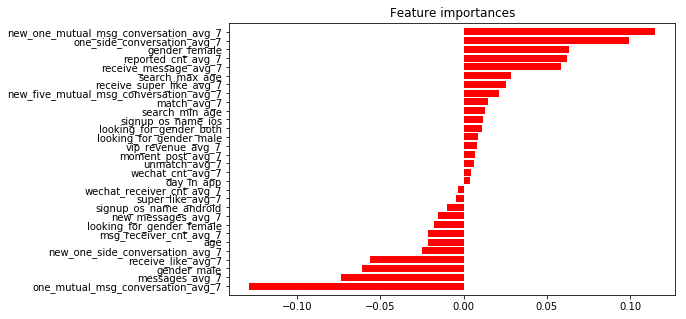

In [73]:
im = log_best.coef_/ np.sum(abs(log_best.coef_))
importances = im[0]
importances
indices = np.argsort(importances)
# Plot the feature importances of the forest
plt.subplots(figsize=(8,5))
plt.title("Feature importances")
plt.barh(range(len(sel_fea_list)), importances[indices],
       color="r", align="center")
plt.yticks(range(len(sel_fea_list)), sel_fea_list[indices])
plt.ylim([-1, len(sel_fea_list)])
plt.show()

### newdata

In [74]:
dftest=pd.read_csv('antispam_test.csv',usecols=lambda column : column not in ['signup_country_name_zh','latest_country_name_zh','latest_province_name_zh','latest_city_name_zh'])

In [75]:
set(dftest.dt)

{'2019-03-20', '2019-04-20', '2019-05-29'}

In [76]:
for i in dftest.columns:
    na_cnt=sum(dftest[i].isna())
    print('{} : {}'.format(i,na_cnt))

dt : 0
user_id : 0
status : 0
gender : 0
age : 0
created_time : 0
day_in_app : 0
is_vip : 0
signup_os_name : 738
latest_os_name : 738
looking_for_gender : 0
search_min_age : 0
search_max_age : 0
msg_receiver_cnt : 277058
wechat_receiver_cnt : 277058
wechat_cnt : 277058
wechat_cnt_strict : 277058
msg_receiver_cnt_avg_3 : 215564
wechat_receiver_cnt_avg_3 : 215564
wechat_cnt_avg_3 : 215564
wechat_cnt_strict_avg_3 : 215564
msg_receiver_cnt_avg_7 : 168405
wechat_receiver_cnt_avg_7 : 168405
wechat_cnt_avg_7 : 168405
wechat_cnt_strict_avg_7 : 168405
msg_receiver_cnt_max_7 : 168405
wechat_receiver_cnt_max_7 : 168405
wechat_cnt_max_7 : 168405
wechat_cnt_strict_max_7 : 168405
reported_cnt : 396786
reported_cnt_avg_3 : 396786
reported_cnt_avg_7 : 396786
reported_cnt_max_7 : 396786
swipe : 13799
likes : 13799
dislike : 13799
super_like : 13799
match : 13799
unmatch : 13799
receive_unmatch : 13799
receive_swipe : 13799
receive_like : 13799
receive_dislike : 13799
receive_super_like : 13799
revenue 

In [77]:
dftest2=dftest.dropna(subset=['signup_os_name','latest_os_name'])
dftest3=dftest2.fillna(0)
dftest4=dftest3.drop(['user_id','created_time'],axis=1)
dftest4['status']=dftest4.status.apply(y)
dftest4=dummy_df(dftest4,todummy_list)

In [78]:
d320=dftest4[dftest4.dt=='2019-03-20'].drop(['dt'],axis=1)
d420=dftest4[dftest4.dt=='2019-04-20'].drop(['dt'],axis=1)
d529=dftest4[dftest4.dt=='2019-05-29'].drop(['dt'],axis=1)

In [79]:
x320=d320.drop(['status'],axis=1)
x420=d420.drop(['status'],axis=1)
x529=d529.drop(['status'],axis=1)
y320=d320['status']
y420=d420['status']
y529=d529['status']

### Random Forest Test

In [80]:
x320re=x320[fea_re]
x420re=x420[fea_re]
x529re=x529[fea_re]

In [81]:
y_pre_rf_320=rfm_test.predict(x320re)
probs_rf_320=rfm_test.predict_proba(x320re)
print(classification_report(y320,y_pre_rf_320))
print('accuracy is: {:.2f}'.format(accuracy_score(y320,y_pre_rf_320)))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     69983
           1       1.00      0.82      0.90     69973

   micro avg       0.91      0.91      0.91    139956
   macro avg       0.92      0.91      0.91    139956
weighted avg       0.92      0.91      0.91    139956

accuracy is: 0.91


0.9852038556809288


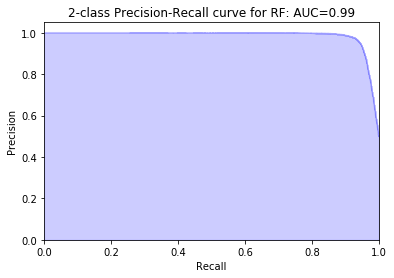

In [82]:
print(average_precision_score(y320,probs_rf_320[:,1]))
precition_rf_320,recall_rf_320,_=precision_recall_curve(y320,probs_rf_320[:,1])
plt.step(recall_rf_320,precition_rf_320,color='b',alpha=0.2,where='post')
plt.fill_between(recall_rf_320,precition_rf_320,step='post',alpha=0.2,color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0,1.05])
plt.xlim([0.0,1.0])
plt.title('2-class Precision-Recall curve for RF: AUC={0:0.2f}'.format(
          average_precision_score(y320,probs_rf_320[:,1])))
plt.show()

In [83]:
y_pre_rf_420=rfm_test.predict(x420re)
probs_rf_420=rfm_test.predict_proba(x420re)
print(classification_report(y420,y_pre_rf_420))
print('accuracy is: {:.2f}'.format(accuracy_score(y420,y_pre_rf_420)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     69991
           1       1.00      0.83      0.91     69967

   micro avg       0.91      0.91      0.91    139958
   macro avg       0.93      0.91      0.91    139958
weighted avg       0.93      0.91      0.91    139958

accuracy is: 0.91


0.9922672127336828


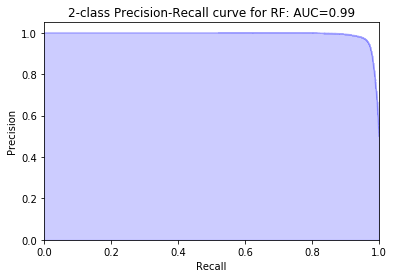

In [84]:
print(average_precision_score(y420,probs_rf_420[:,1]))
precition_rf_420,recall_rf_420,_=precision_recall_curve(y420,probs_rf_420[:,1])
plt.step(recall_rf_420,precition_rf_420,color='b',alpha=0.2,where='post')
plt.fill_between(recall_rf_420,precition_rf_420,step='post',alpha=0.2,color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0,1.05])
plt.xlim([0.0,1.0])
plt.title('2-class Precision-Recall curve for RF: AUC={0:0.2f}'.format(
          average_precision_score(y420,probs_rf_420[:,1])))
plt.show()

In [85]:
y_pre_rf_529=rfm_test.predict(x529re)
probs_rf_529=rfm_test.predict_proba(x529re)
print(classification_report(y529,y_pre_rf_529))
print('accuracy is: {:.2f}'.format(accuracy_score(y529,y_pre_rf_529)))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     69955
           1       1.00      0.76      0.86     69393

   micro avg       0.88      0.88      0.88    139348
   macro avg       0.90      0.88      0.88    139348
weighted avg       0.90      0.88      0.88    139348

accuracy is: 0.88


0.9752932212664969


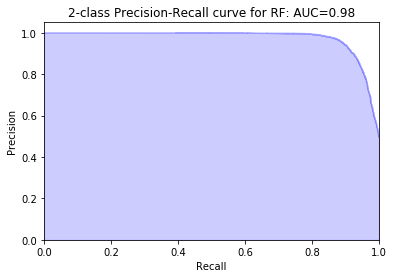

In [86]:
print(average_precision_score(y529,probs_rf_529[:,1]))
precition_rf_529,recall_rf_529,_=precision_recall_curve(y529,probs_rf_529[:,1])
plt.step(recall_rf_529,precition_rf_529,color='b',alpha=0.2,where='post')
plt.fill_between(recall_rf_529,precition_rf_529,step='post',alpha=0.2,color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0,1.05])
plt.xlim([0.0,1.0])
plt.title('2-class Precision-Recall curve for RF: AUC={0:0.2f}'.format(
          average_precision_score(y529,probs_rf_529[:,1])))
plt.show()

### Logistic Regression Test

In [87]:
x320sub=num_scale(x320)[sel_fea_list]
x420sub=num_scale(x420)[sel_fea_list]
x529sub=num_scale(x529)[sel_fea_list]

In [88]:
y_pre_log_320=log_best.predict(x320sub)
probs_log_320=log_best.predict_proba(x320sub)
print(classification_report(y320,y_pre_log_320))
print('accuracy is: {:.2f}'.format(accuracy_score(y320,y_pre_log_320)))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79     69983
           1       0.82      0.70      0.75     69973

   micro avg       0.77      0.77      0.77    139956
   macro avg       0.78      0.77      0.77    139956
weighted avg       0.78      0.77      0.77    139956

accuracy is: 0.77


0.8714846206603515


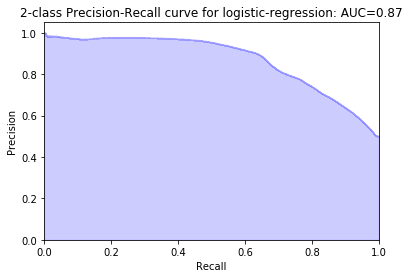

In [89]:
print(average_precision_score(y320,probs_log_320[:,1]))
precition_log_320,recall_log_320,_=precision_recall_curve(y320,probs_log_320[:,1])
plt.step(recall_log_320,precition_log_320,color='b',alpha=0.2,where='post')
plt.fill_between(recall_log_320,precition_log_320,step='post',alpha=0.2,color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0,1.05])
plt.xlim([0.0,1.0])
plt.title('2-class Precision-Recall curve for logistic-regression: AUC={0:0.2f}'.format(
          average_precision_score(y320,probs_log_320[:,1])))
plt.show()

In [90]:
y_pre_log_420=log_best.predict(x420sub)
probs_log_420=log_best.predict_proba(x420sub)
print(classification_report(y420,y_pre_log_420))
print('accuracy is: {:.2f}'.format(accuracy_score(y420,y_pre_log_420)))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79     69991
           1       0.83      0.68      0.75     69967

   micro avg       0.77      0.77      0.77    139958
   macro avg       0.78      0.77      0.77    139958
weighted avg       0.78      0.77      0.77    139958

accuracy is: 0.77


0.8665501264739798


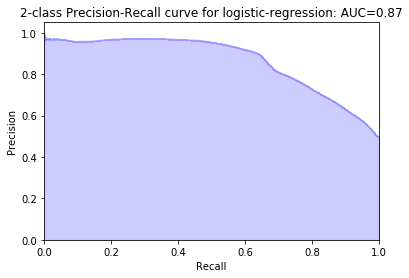

In [91]:
print(average_precision_score(y420,probs_log_420[:,1]))
precition_log_420,recall_log_420,_=precision_recall_curve(y420,probs_log_420[:,1])
plt.step(recall_log_420,precition_log_420,color='b',alpha=0.2,where='post')
plt.fill_between(recall_log_420,precition_log_420,step='post',alpha=0.2,color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0,1.05])
plt.xlim([0.0,1.0])
plt.title('2-class Precision-Recall curve for logistic-regression: AUC={0:0.2f}'.format(
          average_precision_score(y420,probs_log_420[:,1])))
plt.show()

In [92]:
y_pre_log_529=log_best.predict(x529sub)
probs_log_529=log_best.predict_proba(x529sub)
print(classification_report(y529,y_pre_log_529))
print('accuracy is: {:.2f}'.format(accuracy_score(y529,y_pre_log_529)))

              precision    recall  f1-score   support

           0       0.70      0.87      0.77     69955
           1       0.82      0.62      0.71     69393

   micro avg       0.74      0.74      0.74    139348
   macro avg       0.76      0.74      0.74    139348
weighted avg       0.76      0.74      0.74    139348

accuracy is: 0.74


0.8259970978840231


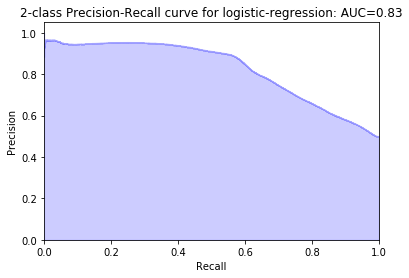

In [93]:
print(average_precision_score(y529,probs_log_529[:,1]))
precition_log_529,recall_log_529,_=precision_recall_curve(y529,probs_log_529[:,1])
plt.step(recall_log_529,precition_log_529,color='b',alpha=0.2,where='post')
plt.fill_between(recall_log_529,precition_log_529,step='post',alpha=0.2,color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0,1.05])
plt.xlim([0.0,1.0])
plt.title('2-class Precision-Recall curve for logistic-regression: AUC={0:0.2f}'.format(
          average_precision_score(y529,probs_log_529[:,1])))
plt.show()

### 0610 data

In [94]:
df610=pd.read_csv('antispam610.csv')

In [95]:
df6102=df610.dropna(subset=['signup_os_name','latest_os_name'])
df6103=df6102.fillna(0)
df6104=df6103.drop(['user_id','created_time'],axis=1)
df6104['status']=df6104.status.apply(y)
df6104=dummy_df(df6104,todummy_list)

In [101]:
d610=df6104[df6104.dt=='2019-06-10'].drop(['dt'],axis=1)
x610=d610.drop(['status'],axis=1)
y610=d610['status']

#### random forest test 0610

In [102]:
x610re=x610[fea_re]

In [103]:
y_pre_rf_610=rfm_test.predict(x610re)
probs_rf_610=rfm_test.predict_proba(x610re)
print(classification_report(y610,y_pre_rf_610))
print('accuracy is: {:.2f}'.format(accuracy_score(y610,y_pre_rf_610)))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93    100000
           1       1.00      0.81      0.90     78198

   micro avg       0.92      0.92      0.92    178198
   macro avg       0.94      0.91      0.91    178198
weighted avg       0.93      0.92      0.92    178198

accuracy is: 0.92


0.9787387741473792


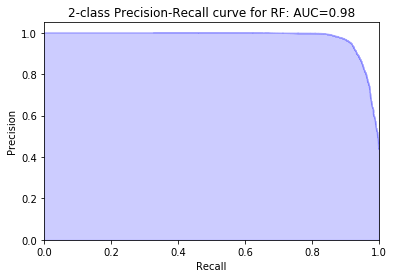

In [104]:
print(average_precision_score(y610,probs_rf_610[:,1]))
precition_rf_610,recall_rf_610,_=precision_recall_curve(y610,probs_rf_610[:,1])
plt.step(recall_rf_610,precition_rf_610,color='b',alpha=0.2,where='post')
plt.fill_between(recall_rf_610,precition_rf_610,step='post',alpha=0.2,color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0,1.05])
plt.xlim([0.0,1.0])
plt.title('2-class Precision-Recall curve for RF: AUC={0:0.2f}'.format(
          average_precision_score(y610,probs_rf_610[:,1])))
plt.show()

#### logistic regression test

In [105]:
x610sub=num_scale(x610)[sel_fea_list]

In [106]:
y_pre_log_610=log_best.predict(x610sub)
probs_log_610=log_best.predict_proba(x610sub)
print(classification_report(y610,y_pre_log_610))
print('accuracy is: {:.2f}'.format(accuracy_score(y610,y_pre_log_610)))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80    100000
           1       0.77      0.62      0.69     78198

   micro avg       0.75      0.75      0.75    178198
   macro avg       0.76      0.74      0.74    178198
weighted avg       0.76      0.75      0.75    178198

accuracy is: 0.75


0.7906565593394559


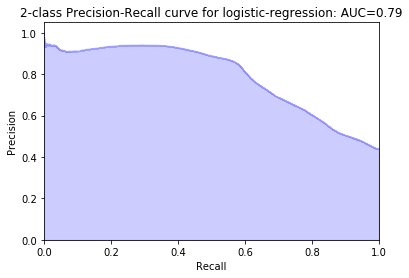

In [107]:
print(average_precision_score(y610,probs_log_610[:,1]))
precition_log_610,recall_log_610,_=precision_recall_curve(y610,probs_log_610[:,1])
plt.step(recall_log_610,precition_log_610,color='b',alpha=0.2,where='post')
plt.fill_between(recall_log_610,precition_log_610,step='post',alpha=0.2,color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0,1.05])
plt.xlim([0.0,1.0])
plt.title('2-class Precision-Recall curve for logistic-regression: AUC={0:0.2f}'.format(
          average_precision_score(y610,probs_log_610[:,1])))
plt.show()

In [139]:
yprerf610=pd.Series(y_pre_rf_610,name='yprerf_tobban')
yprelog610=pd.Series(y_pre_log_610,name='yprelog_tobban')
probrf610=pd.Series(probs_rf_610[:,1],name='probsrf_tob1')
problog610=pd.Series(probs_log_610[:,1],name='probslog_tob1')
ys610=pd.Series(y610,name='bin_status').reset_index(drop=True)
dfuser=df6103[['user_id','status']].reset_index(drop=True)
dfuserpre=pd.concat([dfuser,ys610,yprerf610,yprelog610,probrf610,problog610],axis=1)

In [142]:
dfuserpre.to_csv('dfuserpre.csv',encoding='utf-8',index=False,header=False)

In [143]:
dfuserpre.head()

,user_id,status,bin_status,yprerf_tobban,yprelog_tobban,probsrf_tob1,probslog_tob1
0,196506023,default,0,0,1,0.008224,0.541432
1,196505031,default,0,0,0,0.007862,0.252661
2,196503335,default,0,0,0,0.004663,0.065909
3,196502791,default,0,0,0,0.002519,0.353065
4,196500359,default,0,0,0,0.051554,0.004683
